# Amino acid representation

The first layer of the **Seq2Sec** is a 1 to 1 convolution. This layer converts each residue from 20 channels used to represent amino acids in one-hot enconding format into C channels with real numbers. Therefore, this layer learns an effective representation of amino acids to be used along the network.

This notebook has some analysis of representations learned.

In [41]:
from seq2sec.model import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

In [42]:
net = load('./models/teste-uncloss-ss3_ss4_buried.pth') 

In [43]:
weights = net.state_dict()['feat.conv.weight'][:,1:-1,0]
aa = list('ACDEFGHIKLMNPQRSTVWY')

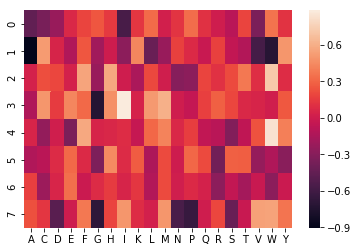

In [44]:
sns.heatmap(weights, xticklabels=aa);

### Distance between amino acids

Matrix of distances between amino acid representations calculated using euclidean distance. _Should I use standardized euclidean distance?_

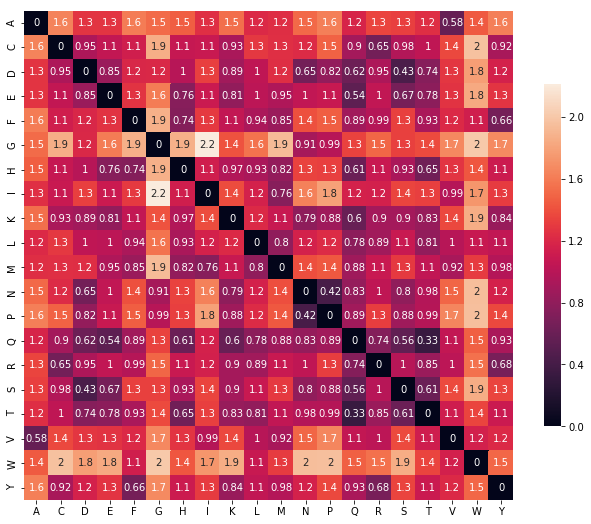

In [47]:
D = squareform(pdist(np.transpose(weights), 'euclidean', V=None))
plt.subplots(figsize=(11, 9))
sns.heatmap(D, square=True, annot=True, linewidths=.0, cbar_kws={"shrink": .7}, xticklabels=aa, yticklabels=aa);

In [65]:
Z = linkage(np.transpose(weights), 'ward', 'euclidean', optimal_ordering=True)
Z

array([[16.        , 13.        ,  0.33282681,  2.        ],
       [11.        , 12.        ,  0.41671517,  2.        ],
       [15.        ,  2.        ,  0.4343196 ,  2.        ],
       [ 0.        , 17.        ,  0.57967403,  2.        ],
       [ 1.        , 14.        ,  0.65227106,  2.        ],
       [19.        ,  4.        ,  0.66241281,  2.        ],
       [20.        ,  6.        ,  0.69718401,  3.        ],
       [ 7.        , 10.        ,  0.7556442 ,  2.        ],
       [ 3.        , 26.        ,  0.76700883,  4.        ],
       [28.        ,  8.        ,  0.9070613 ,  5.        ],
       [22.        , 21.        ,  1.03445362,  4.        ],
       [27.        ,  9.        ,  1.06402162,  3.        ],
       [24.        , 25.        ,  1.16628916,  4.        ],
       [30.        ,  5.        ,  1.31754418,  5.        ],
       [23.        , 31.        ,  1.44265276,  5.        ],
       [32.        , 29.        ,  1.51937493,  9.        ],
       [34.        , 18.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [10.0, 10.0, 37.5, 37.5],
  [23.75, 23.75, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [120.0, 120.0, 135.0, 135.0],
  [105.0, 105.0, 127.5, 127.5],
  [116.25, 116.25, 145.0, 145.0],
  [80.0, 80.0, 130.625, 130.625],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [170.0, 170.0, 195.0, 195.0],
  [105.3125, 105.3125, 182.5, 182.5],
  [39.375, 39.375, 143.90625, 143.90625]],
 'dcoord': [[0.0, 0.5796740340432132, 0.5796740340432132, 0.0],
  [0.0, 0.7556442015843341, 0.7556442015843341, 0.0],
  [0.7556442015843341, 1.0640216157218716, 1.0640216157218716, 0.0],
  [0.5796740340432132,
   1.442652755179043,
   1.442652755179043,
   1.0640216157218716],
  [1.442652755179043, 1.5557666462041726, 1.5557666462041726, 0.0],
  [0.0, 0.6522710631901522, 0.6522710631901522,

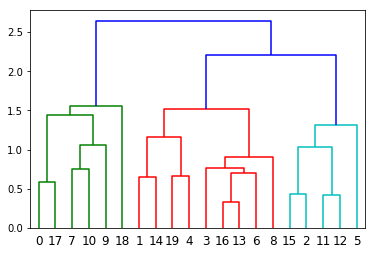

In [66]:
dendrogram(Z)

In [67]:
aa[15]

'S'